In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [87]:
df = pd.DataFrame(
    {
        'Name' :['Bob','John','Foo','Bar','Alex','Tom'],
        'Math' :['A+','B','A','F','D','C'],
        'English' : ['C','B','B','A+','F','A'],
        'Age' : [13,16,16,15,15,13]
    }
)

In [88]:
df

,Name,Math,English,Age
0,Bob,A+,C,13
1,John,B,B,16
2,Foo,A,B,16
3,Bar,F,A+,15
4,Alex,D,F,15
5,Tom,C,A,13


In [28]:
#노가다 방법

#df.drop(columns=['English'], inplace=True)
#df

,Name,Math,Age
0,Bob,A+,13
1,John,B,16
2,Foo,A,16
3,Bar,F,15
4,Alex,D,15
5,Tom,C,13


In [50]:
#df.loc[6] = ['Bob','C',13]
#df.loc[7] =['John','B',16]
#df.loc[8] = ['Foo','A',16]
#df.loc[9] = ['Bar','F',15]
#df.loc[10] = ['Alex','D',15]
#df.loc[11] = ['Tom','C',13]

In [52]:
#df.replace({'Math','Subject'})

C:\Users\USER\AppData\Local\Temp\ipykernel_16540\2243159893.py:1: FutureWarning: DataFrame.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df.replace({'Math','Subject'})


,Name,Math,Age
0,Bob,A+,13
1,John,B,16
2,Foo,A,16
3,Bar,F,15
4,Alex,D,15
5,Tom,C,13
6,Bob,C,13
7,John,B,16
8,Foo,A,16
9,Bar,F,15


In [89]:
#모범답안(Unpivot : column to value)
math = df.iloc[:,[0,1,-1]]
math.columns = ['Name','Grade','Age']

english = df.iloc[:,[0,2,-1]]
english.columns = ['Name','Grade','Age']

In [90]:
math['Subject'] = 'Math'
english['Subject'] = 'English'

C:\Users\USER\AppData\Local\Temp\ipykernel_16540\3794971907.py:2: SettingWithCopyWarning: <- 경고문구

#경고 문구 본문


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inderer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english['Subject'] = 'English'


In [91]:
math

,Name,Grade,Age,Subject
0,Bob,A+,13,Math
1,John,B,16,Math
2,Foo,A,16,Math
3,Bar,F,15,Math
4,Alex,D,15,Math
5,Tom,C,13,Math


In [92]:
pd.concat([math,english])

,Name,Grade,Age,Subject
0,Bob,A+,13,Math
1,John,B,16,Math
2,Foo,A,16,Math
3,Bar,F,15,Math
4,Alex,D,15,Math
5,Tom,C,13,Math
0,Bob,C,13,English
1,John,B,16,English
2,Foo,B,16,English
3,Bar,A+,15,English


In [103]:
# melt 함수
df2=df.melt(['Name','Age'])
df2.columns=['Name','Age','Subject','Grade']

In [104]:
df2

,Name,Age,Subject,Grade
0,Bob,13,Math,A+
1,John,16,Math,B
2,Foo,16,Math,A
3,Bar,15,Math,F
4,Alex,15,Math,D
5,Tom,13,Math,C
6,Bob,13,English,C
7,John,16,English,B
8,Foo,16,English,B
9,Bar,15,English,A+


In [105]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [106]:
df2['Grade'].replace({'F':0,'D':1,'D+':2,'C':3,'C+':4,'B':5,'B+':6,'A':7,'A+':8}, inplace=True)

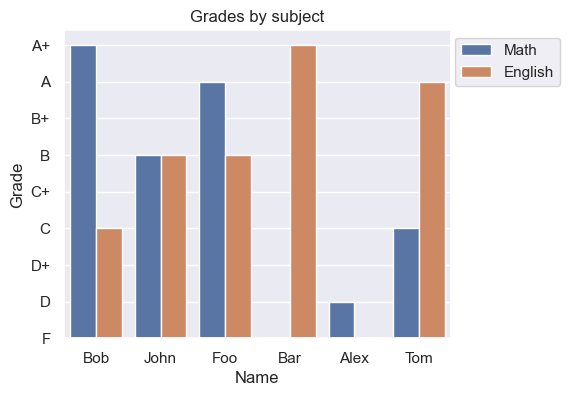

In [113]:
plt.subplots(figsize=(5,4))
sns.barplot(data=df2, x='Name', y='Grade', hue='Subject')
plt.yticks(range(9),['F','D','D+','C','C+','B','B+','A','A+'])
plt.title('Grades by subject')
plt.legend(bbox_to_anchor=(1.3,1.0), loc="upper right")
plt.savefig('grades.png', bbox_inches='tight')
plt.show()

In [115]:
seoul = pd.read_csv("./서울시 부동산 실거래가 정보.csv",encoding='cp949')

C:\Users\USER\AppData\Local\Temp\ipykernel_16540\4015164022.py:1: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  seoul = pd.read_csv("./서울시 부동산 실거래가 정보.csv",encoding='cp949')


## 실습
* 저층(-3층)과 고층(4층-) 사이의 물건 금액이 차이가 나는지 확인해보기
* 해당 분석 이후, 같은 데이터로 추가 분석이 있습니다.

In [129]:
#나의 시도

In [120]:
f = seoul['층'] <= 3.0
f2 = seoul['층'] >= 4.0

In [119]:
seoul[f]

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
5,2024,11545,금천구,10300,시흥동,1.0,대지,1.0,6.0,우강빌라A동,...,8700,45.860,21.0000,-1.0,NaN,NaN,2002.0,연립다세대,중개거래,서울 금천구
6,2024,11545,금천구,10100,가산동,1.0,대지,41.0,7.0,우림빌라트3(41-7),...,23995,40.400,22.0000,2.0,NaN,NaN,2003.0,연립다세대,중개거래,서울 금천구
11,2024,11545,금천구,10200,독산동,1.0,대지,234.0,48.0,모던씨티빌리지,...,25400,62.130,38.0000,3.0,NaN,NaN,1998.0,연립다세대,중개거래,서울 금천구
12,2024,11545,금천구,10100,가산동,1.0,대지,535.0,7.0,G밸리 하우스디 어반,...,16000,19.373,29.2666,3.0,NaN,NaN,2019.0,오피스텔,중개거래,서울 금천구
17,2024,11545,금천구,10300,시흥동,1.0,대지,3.0,107.0,이지홈,...,30500,54.880,36.0000,3.0,NaN,NaN,2013.0,연립다세대,중개거래,서울 금천구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58460,2006,11545,금천구,10300,시흥동,1.0,대지,109.0,1.0,무지개,...,26000,85.270,NaN,2.0,NaN,NaN,1980.0,아파트,NaN,NaN
58463,2006,11545,금천구,10300,시흥동,1.0,대지,989.0,10.0,그린하이클라스빌,...,14200,71.680,82.5600,2.0,NaN,NaN,2005.0,오피스텔,NaN,NaN
58465,2006,11545,금천구,10300,시흥동,1.0,대지,817.0,48.0,두산캐빈빌라,...,11300,71.870,33.5600,2.0,NaN,NaN,2003.0,연립다세대,NaN,NaN
58467,2006,11545,금천구,10100,가산동,1.0,대지,239.0,2.0,원평빌라트(6차)\t,...,6000,37.370,44.9800,2.0,NaN,NaN,2002.0,오피스텔,NaN,NaN


In [125]:
seoul[f].describe()

,접수연도,자치구코드,법정동코드,지번구분,본번,부번,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,취소일,건축년도
count,20252.000000,20252.0,20252.000000,20252.000000,20252.000000,20252.000000,2.025200e+04,20252.000000,20252.000000,16871.000000,20252.000000,2.150000e+02,20221.000000
mean,2014.956992,11545.0,10246.104088,1.001975,718.008888,33.315574,2.014984e+07,21640.499457,54.286865,32.966906,1.983063,2.021728e+07,1997.279215
std,5.344327,0.0,62.625160,0.044399,358.924541,113.673963,5.343432e+04,10452.599318,19.494471,18.428623,1.035949,1.208295e+04,90.863494
min,2006.000000,11545.0,10100.000000,1.000000,1.000000,0.000000,2.006010e+07,1950.000000,5.950000,0.000000,-1.000000,2.020032e+07,0.000000
25%,2010.000000,11545.0,10200.000000,1.000000,378.000000,2.000000,2.010081e+07,15000.000000,40.610000,23.310000,1.000000,2.021041e+07,1991.000000
50%,2016.000000,11545.0,10300.000000,1.000000,890.000000,11.000000,2.016033e+07,20000.000000,53.610000,30.000000,2.000000,2.022042e+07,2002.000000
75%,2020.000000,11545.0,10300.000000,1.000000,992.000000,30.000000,2.020012e+07,26000.000000,63.560000,39.325000,3.000000,2.023012e+07,2012.000000
max,2024.000000,11545.0,10300.000000,2.000000,1162.000000,2746.000000,2.024051e+07,173285.000000,292.030000,255.940000,3.000000,2.024050e+07,2024.000000


In [126]:
seoul[f2].describe()

,접수연도,자치구코드,법정동코드,지번구분,본번,부번,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,취소일,건축년도
count,32441.000000,32441.0,32441.000000,32441.000000,32441.000000,32441.000000,3.244100e+04,32441.000000,32441.000000,18781.000000,32441.000000,3.210000e+02,32409.000000
mean,2015.647576,11545.0,10232.132178,1.004655,749.694183,14.888074,2.015676e+07,29802.561758,59.734123,21.455121,9.577140,2.021834e+07,1911.446234
std,5.216407,0.0,70.777220,0.068067,358.246035,52.259184,5.214929e+04,16312.209936,26.176356,19.920263,6.158573,1.289169e+04,424.001785
min,2006.000000,11545.0,10100.000000,1.000000,1.000000,0.000000,2.006010e+07,3900.000000,12.000000,0.000000,4.000000,2.020023e+07,0.000000
25%,2012.000000,11545.0,10200.000000,1.000000,384.000000,0.000000,2.012032e+07,18700.000000,41.220000,0.000000,5.000000,2.021020e+07,1998.000000
50%,2016.000000,11545.0,10200.000000,1.000000,952.000000,2.000000,2.016092e+07,26000.000000,59.820000,22.010000,8.000000,2.022043e+07,2004.000000
75%,2020.000000,11545.0,10300.000000,1.000000,1013.000000,13.000000,2.020061e+07,36500.000000,84.420000,33.040000,13.000000,2.023051e+07,2014.000000
max,2024.000000,11545.0,10300.000000,2.000000,1162.000000,2745.000000,2.024052e+07,147500.000000,161.200000,124.870000,46.000000,2.024051e+07,2024.000000


In [130]:
#모범답안
def floor(x):
    if x > 3:
        return '고층'
    elif x <= 3:
        return '저층'
    else:
        return float('nan')

seoul['고층'] = seoul['층'].apply(floor)

In [133]:
from sklearn.datasets import load_iris
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm
[f.name for f in fm.fontManager.ttflist]
plt.rc('font', family='Malgun Gothic')

<Axes: xlabel='고층', ylabel='물건금액(만원)'>

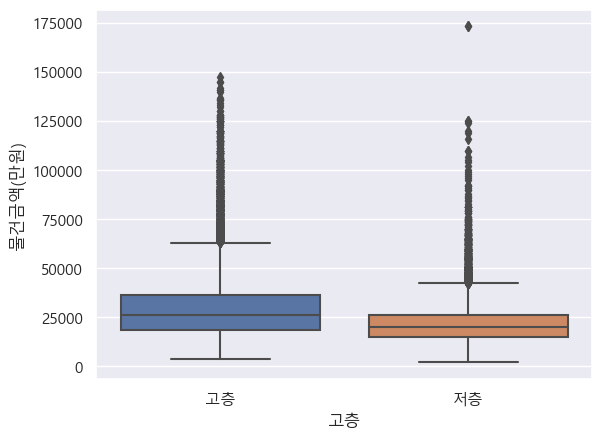

In [135]:
sns.boxplot(data=seoul, x='고층', y='물건금액(만원)')

In [199]:
seoul['물건금액(log2 만원)'] = np.log2(seoul['물건금액(만원)'])

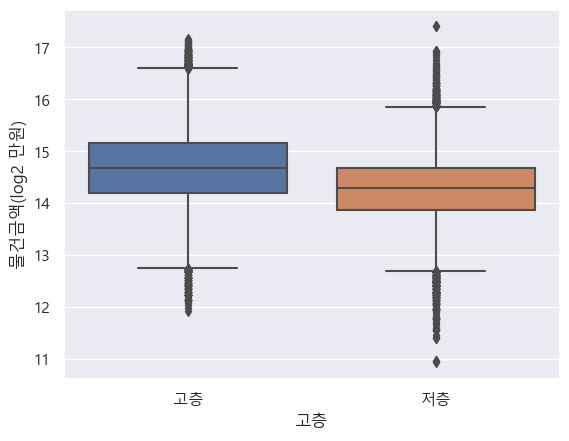

In [200]:
sns.boxplot(data=seoul, x='고층', y='물건금액(log2 만원)')
plt.show()

In [142]:
from scipy import stats

In [202]:
m = seoul['고층'] == '고층'
m2 = seoul['고층'] == '저층'
stats.ttest_ind(seoul[m]['물건금액(log2 만원)'], seoul[m2]['물건금액(log2 만원)'])

TtestResult(statistic=66.78462489984318, pvalue=0.0, df=52691.0)

In [204]:
a=seoul[m]['물건금액(log2 만원)']
b=seoul[m2]['물건금액(log2 만원)']

In [205]:
stats.ttest_ind(a, b)

TtestResult(statistic=66.78462489984318, pvalue=0.0, df=52691.0)

In [207]:
stats.shapiro(seoul['물건금액(log2 만원)'])

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9933058023452759, pvalue=3.671401976531021e-43)

In [208]:
stats.ks_2samp(a,b)

#stat = 0 ==> 정규성을 가정하고 분석하지 못함.

KstestResult(statistic=0.26065008956565605, pvalue=0.0, statistic_location=14.501837184902296, statistic_sign=-1)

In [209]:
stats.mannwhitneyu(a, b)

MannwhitneyuResult(statistic=438816429.0, pvalue=0.0)

#실습

* 판매 순위가 높은 그룹과 낮은 그룹을 비교했을 때, 높은 그룹의 책 가격이 더 비싼 경향이 있는지 확인해보기
* 판매 순위가 높은 그룹과 낮은 그룹 사이에서, 장르가 서로 비슷한 경향이 있는지 알아보기

In [161]:
seller = pd.read_excel('./BestSellerList.xlsx')

In [163]:
seller

,월,순위,도서명,저자,출판사,출판 일자,정가,적립포인트,대분야,ISBN
0,2021년,1,달러구트 꿈 백화점(레인보우 에디션),이미예,팩토리나인,20200708,13800,690,판타지소설,9791165341909
1,2021년,2,주린이가 가장 알고 싶은 최다질문 TOP 77(교보 단독 리커버),염승환,메이트북스,20210726,18000,900,주식투자,9791160023459
2,2021년,3,미드나잇 라이브러리(평행우주 에디션),매트 헤이그,인플루엔셜,20210428,15800,790,영미소설일반,9791191056556
3,2021년,4,조국의 시간,조국,한길사,20210531,17000,850,정치가,9788935668663
4,2021년,5,소크라테스 익스프레스,에릭 와이너,어크로스,20210428,18000,900,고대/그리스철학,9791190030922
...,...,...,...,...,...,...,...,...,...,...
1095,10월,96,누구에게도 상처받을 필요는 없다,지민석,스튜디오오드리,20220408,14000,700,한국에세이,9791191043709
1096,10월,97,그리스 로마 신화 30: 기나긴 모험 그 끝의 이야기,박시연,아울북,20220914,15000,750,종교/신화,9788950971656
1097,10월,98,참 괜찮은 태도,박지현,메이븐,20220930,16800,840,인문교양,9791190538480
1098,10월,99,인생의 역사,신형철,난다,20221017,18000,900,한국에세이,9791191859379


In [167]:
def sel(x):
    if x > 50:
        return '판매 낮음'
    elif x <= 50:
        return '판매 높음'
    else:
        return float('nan')

seller['판매순위'] = seller['순위'].apply(sel)

In [168]:
seller['판매순위']

0       판매 높음
1       판매 높음
2       판매 높음
3       판매 높음
4       판매 높음
        ...  
1095    판매 낮음
1096    판매 낮음
1097    판매 낮음
1098    판매 낮음
1099    판매 낮음
Name: 판매순위, Length: 1100, dtype: object

<Axes: xlabel='판매순위', ylabel='정가'>

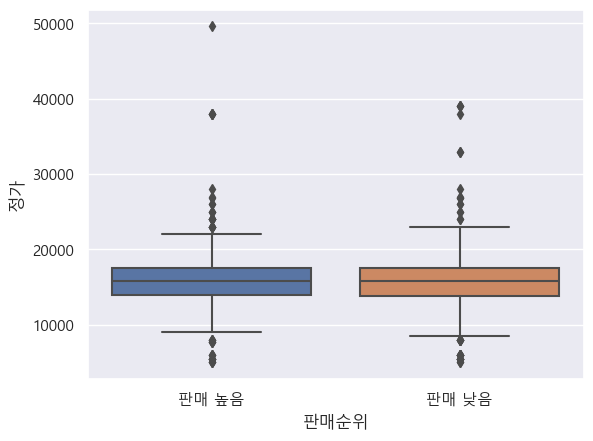

In [169]:
sns.boxplot(data=seller, x='판매순위', y='정가')

In [170]:
s = seller['판매순위'] == '판매 높음'
s2 = seller['판매순위'] == '판매 낮음'

In [175]:
stats.ttest_ind(seller[s]['정가'], seller[s2]['정가'])

# pvalue가 0.5로 0.05보다 높으므로 귀무가설이 기각되지 않는다. 이는 모평균이 차이나지 않는다는 것을 의미한다. 따라서 높은 그룹의 책 가격이 더 비싼 경향은 없다.

TtestResult(statistic=0.6653493757951887, pvalue=0.5059667894860435, df=1098.0)

In [186]:
# 선생님 답안

In [188]:
seller['베스트셀러'] = seller['순위'] < seller['순위'].median()

In [187]:
stats.shapiro(seller['정가'])

ShapiroResult(statistic=0.8636937737464905, pvalue=7.484469204340916e-30)

In [196]:
stats.mannwhitneyu(seller['정가'][seller['베스트셀러']], seller['정가'][-seller['베스트셀러']])

MannwhitneyuResult(statistic=154686.5, pvalue=0.5134903979402077)

장르가 서로 비슷한 경향 -> 빈도를 계산해야함.

카이제곱검정 활용

In [189]:
A = seller[seller['베스트셀러']].value_counts('대분야')
B = seller[-seller['베스트셀러']].value_counts('대분야')

In [190]:
AB = pd.merge(pd.DataFrame(A), pd.DataFrame(B), left_index=True, right_index=True)

In [194]:
chi2, p, dof, expected = stats.chi2_contingency(AB['count_x'], AB['count_y'])

In [195]:
p

1.0

In [ ]:
AB2 = AB.sort_values([])